# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/femail |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [4]:
df_titanic['Fare'] = df_titanic['Fare'].replace('[\$,]', '', regex=True).astype(float)
df_titanic['Fare']


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

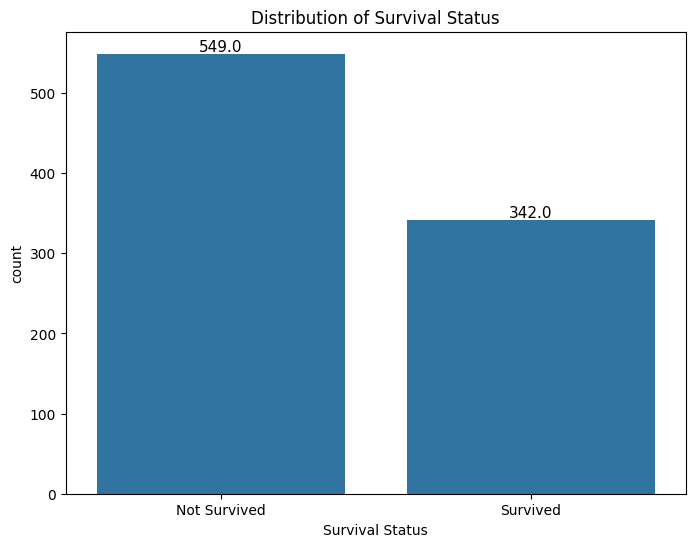

In [9]:


# Map the 'Survived' column to human-readable labels
df_titanic['Survival Status'] = df_titanic['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survival Status', data=df_titanic)

# Add figures on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and show plot
plt.title('Distribution of Survival Status')
plt.show()

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

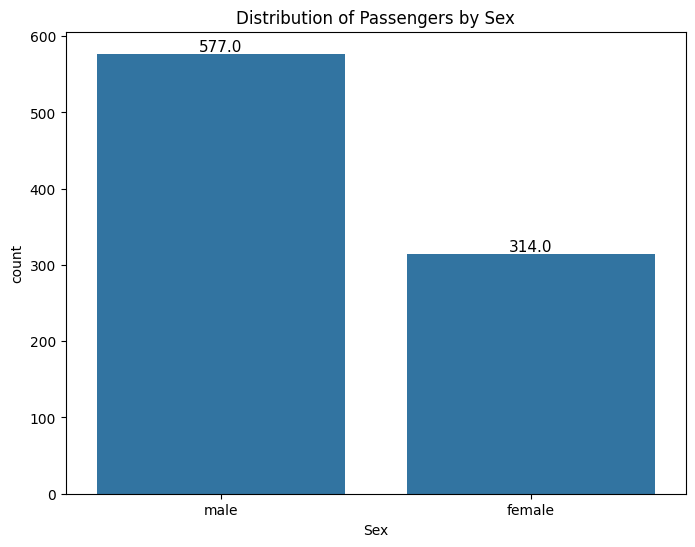

In [10]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', data=df_titanic)

# Add figures on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and show plot
plt.title('Distribution of Passengers by Sex')
plt.show()


##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [10]:
# Convert back to numeric temporarily for the calculation
df_titanic['Survived_numeric'] = df_titanic['Survived'].map({'Not Survived': 0, 'Survived': 1})

# Now calculate the mean
print(df_titanic.groupby('Sex')['Survived_numeric'].mean())

# Optionally, drop the temporary column if it's no longer needed
df_titanic.drop('Survived_numeric', axis=1, inplace=True)

survival_rate = df_titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()*100
survival_rate


Sex
female    0.742038
male      0.188908
Name: Survived_numeric, dtype: float64


Survived,Not Survived,Survived
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

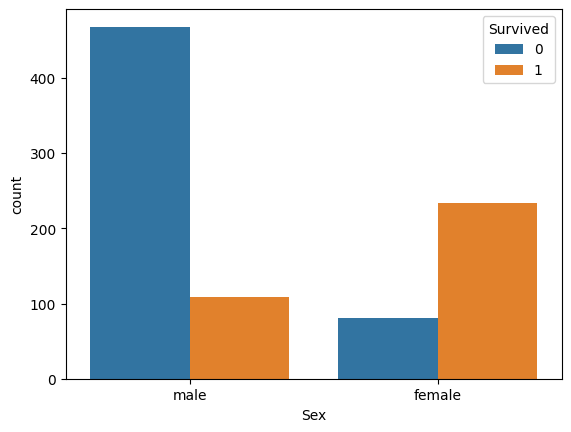

In [32]:
# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df_titanic)

# Add figures on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and show plot
plt.title('Distribution of Passengers by Sex and Survival Status')
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [35]:

df_titanic.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

##### Pclass 1 
Survival Rate: 62.96%

##### Pclass 2 
Survival Rate: 47.28%

##### Pclass 3
 Survival Rate: 24.24%

##### Task 9: Plot Perished vs. Survived for each Pclass

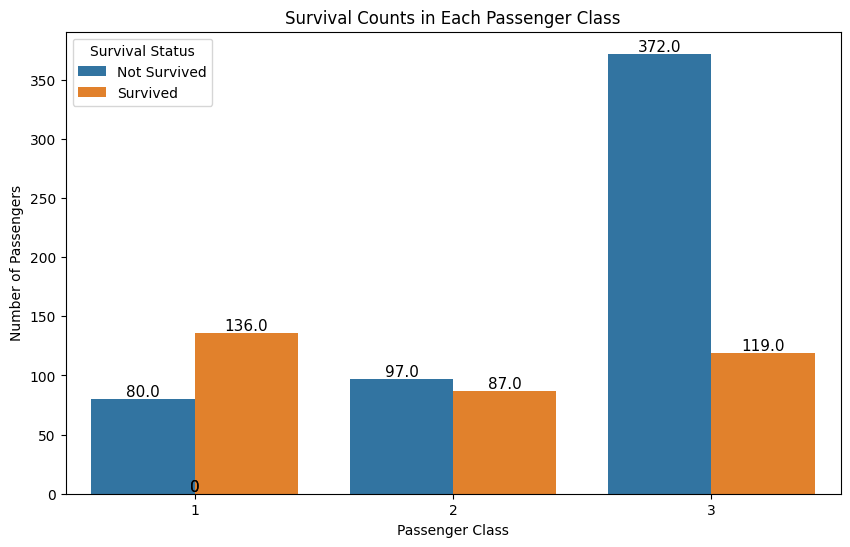

In [11]:
# Create the count plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
ax = sns.countplot(x='Pclass', hue='Survived', data=df_titanic)

# Add figures on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels
plt.title('Survival Counts in Each Passenger Class')  # Adding a title
plt.xlabel('Passenger Class')  # Labeling the x-axis
plt.ylabel('Number of Passengers')  # Labeling the y-axis
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])  # Adjust legend

# Show plot
plt.show()

Most of 3rd class members died and majority of the first class members survived

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

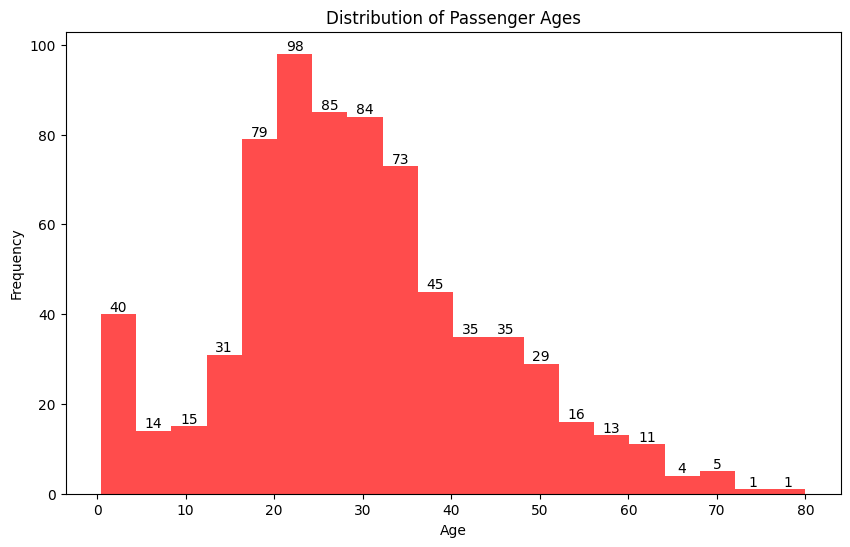

In [15]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
n, bins, patches = plt.hist(df_titanic['Age'], bins=20, color='red', alpha=0.7)

# Add figures on the bars
for i in range(len(patches)):
    plt.text(x=bins[i] + (bins[i + 1] - bins[i]) / 2, y=n[i], s=int(n[i]),
             ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Distribution of Passenger Ages')  # Adding a title
plt.xlabel('Age')  # Labeling the x-axis
plt.ylabel('Frequency')  # Labeling the y-axis

# Show plot
plt.show()

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

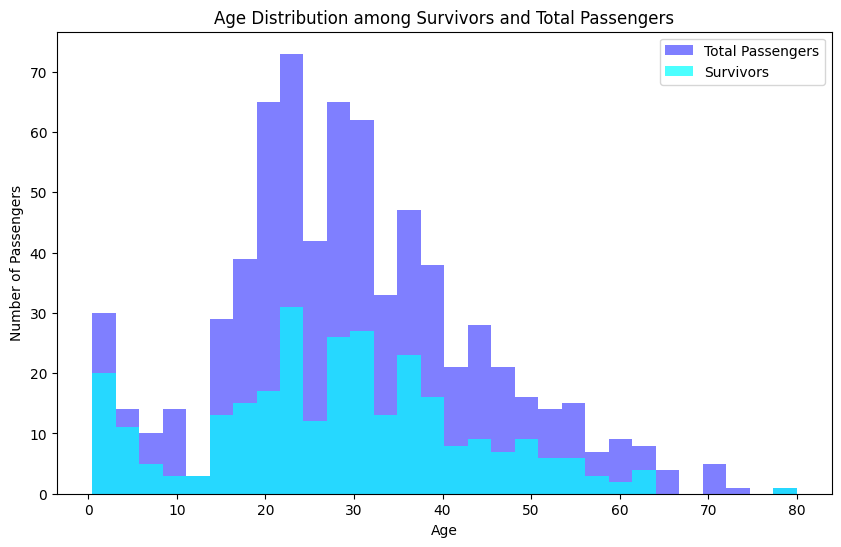

In [38]:

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot histogram for all passengers' ages
plt.hist(df_titanic['Age'].dropna(), bins=30, alpha=0.5, label='Total Passengers', color='blue')

# Plot histogram for the ages of passengers who survived
plt.hist(df_titanic[df_titanic['Survived']==1]['Age'].dropna(), bins=30, alpha=0.7, label='Survivors', color='cyan')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution among Survivors and Total Passengers')
plt.legend()

# Show the plot
plt.show()


Children have higher survival rate.

[Back to Top](#Table-of-Contents)
